In [1]:
import pandas as pd
import os

import numpy as np
import gsw
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=DeprecationWarning) 
df = pd.read_csv('9886d82b-5107-5390-a97c-483d08533113.csv')
df.head()

,FID,time,profile,depth,segment,distance,trajectory,lat_uv,lon_uv,time_uv,...,qartod_temperature_gross_range_flag,qartod_temperature_primary_flag,qartod_temperature_rate_of_change_flag,qartod_temperature_spike_flag,roll,salinity,temperature,geom,source,source_id
0,9886d82b-5107-5390-a97c-483d08533113.1,2022-01-25T19:36:30.079,0,9.373403,0,0.00,0,44.637481,-124.30437,1.643140e+09,...,1.0,1.0,2.0,1.0,7.399979,31.132622,9.6281,POINT (-124.3033235242054 44.63791282960069),ioos.gliderdac.gliderdac,ce_382-20220125T1919
1,9886d82b-5107-5390-a97c-483d08533113.2,2022-01-25T19:36:51.005,0,13.221829,0,2.56,0,44.637481,-124.30437,1.643140e+09,...,1.0,1.0,1.0,1.0,7.399979,31.771090,9.7523,POINT (-124.3033149705564 44.6378905901134),ioos.gliderdac.gliderdac,ce_382-20220125T1919
2,9886d82b-5107-5390-a97c-483d08533113.3,2022-01-25T19:37:11.996,0,17.228876,0,5.17,0,44.637481,-124.30437,1.643140e+09,...,1.0,1.0,1.0,1.0,7.399979,32.118690,9.9353,POINT (-124.3033231668851 44.63786784566835),ioos.gliderdac.gliderdac,ce_382-20220125T1919
3,9886d82b-5107-5390-a97c-483d08533113.4,2022-01-25T19:37:30.197,0,17.228876,0,10.25,0,44.637481,-124.30437,1.643140e+09,...,NaN,NaN,NaN,NaN,7.399979,NaN,NaN,POINT (-124.3033799514114 44.63784683826152),ioos.gliderdac.gliderdac,ce_382-20220125T1919
4,9886d82b-5107-5390-a97c-483d08533113.5,2022-01-25T19:37:32.234,0,20.670509,0,10.81,0,44.637481,-124.30437,1.643140e+09,...,1.0,1.0,1.0,1.0,7.399979,32.150429,9.9626,POINT (-124.3033863070784 44.63784448698572),ioos.gliderdac.gliderdac,ce_382-20220125T1919


In [2]:
df =  df.fillna(0)

In [3]:
import geopy.distance

df['distance']=df.apply(lambda row: geopy.distance.distance((44.63769497775265, -124.30379745067705),(row['lat_uv'],row['lon_uv'])).km, axis=1)

In [4]:
# make time data into Timestamp format
def try_totime(t):
    try:
        return pd.Timestamp(t)
    except:
        return np.nan

In [5]:
df['time'] = df.time.map(try_totime)

In [6]:
df.depth

0           9.373403
1          13.221829
2          17.228876
3          17.228876
4          20.670509
             ...    
316381    964.395264
316382    967.120178
316383    969.854919
316384    971.582581
316385    971.582581
Name: depth, Length: 316386, dtype: float64

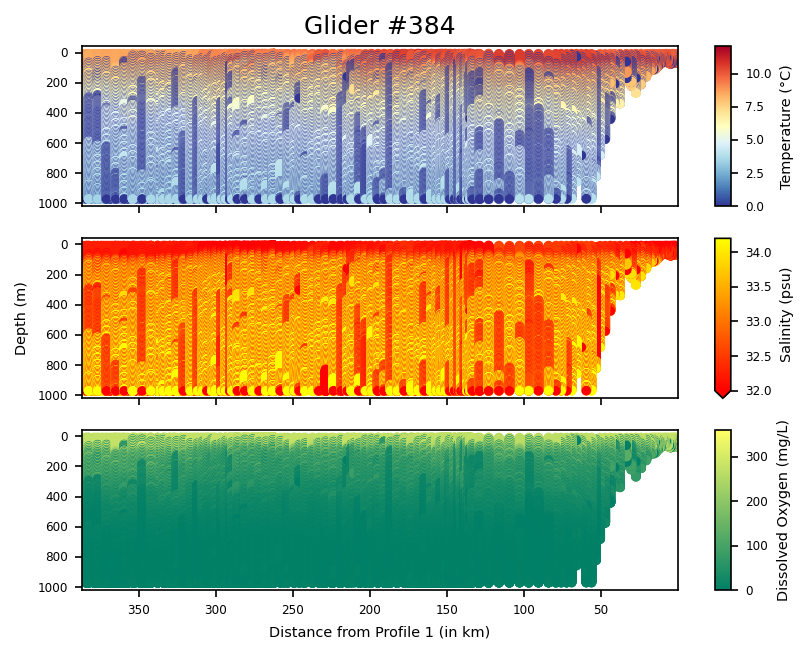

In [9]:
# Plot the data - Distance on x-axis
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, sharey=True)
fig.set_size_inches(6.4,4.8)
# fig.set_size_inches(8,8)
fig.set_dpi(150)

ms = 56 #marker size
a1 = ax1.scatter(df.distance, df.depth, c=df.temperature, marker=".", s=ms, cmap='RdYlBu_r')
a2 = ax2.scatter(df.distance, df.depth, c=df.salinity, marker=".", s=ms, cmap='autumn', vmin=32, vmax=34.2)
a3 = ax3.scatter(df.distance, df.depth, c=df.dissolved_oxygen, marker=".", s=ms, cmap='summer') #vmin=0, vmax=300

cb1 = plt.colorbar(a1,ax=ax1, aspect=10)
cb2 = plt.colorbar(a2,ax=ax2,extend='min', aspect=10)
cb3 = plt.colorbar(a3,ax=ax3, aspect=10)
cb1.set_label('Temperature (°C)',fontsize='x-small')
cb2.set_label('Salinity (psu)',fontsize='x-small')
cb3.set_label('Dissolved Oxygen (mg/L)',fontsize='x-small')

ax2.set_ylabel("Depth (m)",fontsize='x-small')
ax1.invert_yaxis()

ax3.set_xlabel('Distance from Profile 1 (in km)',fontsize='x-small')
ax1.set_xlim(min(df.distance),max(df.distance));
ax1.invert_xaxis()

ax1.set_title('Glider #384')

ax1.tick_params(labelsize='xx-small')
ax2.tick_params(labelsize='xx-small')
ax3.tick_params(labelsize='xx-small')
cb1.ax.tick_params(labelsize='xx-small')
cb2.ax.tick_params(labelsize='xx-small')
cb3.ax.tick_params(labelsize='xx-small')

In [10]:
df1 = pd.read_csv('9886d82b-5107-5390-a97c-483d08533113.csv', parse_dates=['time'], index_col='time')


In [11]:
df1.head()

,FID,profile,depth,segment,distance,trajectory,lat_uv,lon_uv,time_uv,u,...,qartod_temperature_gross_range_flag,qartod_temperature_primary_flag,qartod_temperature_rate_of_change_flag,qartod_temperature_spike_flag,roll,salinity,temperature,geom,source,source_id
time,,,,,,,,,,,,,,,,,,,,,
2022-01-25 19:36:30.079,9886d82b-5107-5390-a97c-483d08533113.1,0,9.373403,0,0.00,0,44.637481,-124.30437,1.643140e+09,0.016631,...,1.0,1.0,2.0,1.0,7.399979,31.132622,9.6281,POINT (-124.3033235242054 44.63791282960069),ioos.gliderdac.gliderdac,ce_382-20220125T1919
2022-01-25 19:36:51.005,9886d82b-5107-5390-a97c-483d08533113.2,0,13.221829,0,2.56,0,44.637481,-124.30437,1.643140e+09,0.016631,...,1.0,1.0,1.0,1.0,7.399979,31.771090,9.7523,POINT (-124.3033149705564 44.6378905901134),ioos.gliderdac.gliderdac,ce_382-20220125T1919
2022-01-25 19:37:11.996,9886d82b-5107-5390-a97c-483d08533113.3,0,17.228876,0,5.17,0,44.637481,-124.30437,1.643140e+09,0.016631,...,1.0,1.0,1.0,1.0,7.399979,32.118690,9.9353,POINT (-124.3033231668851 44.63786784566835),ioos.gliderdac.gliderdac,ce_382-20220125T1919
2022-01-25 19:37:30.197,9886d82b-5107-5390-a97c-483d08533113.4,0,17.228876,0,10.25,0,44.637481,-124.30437,1.643140e+09,0.016631,...,NaN,NaN,NaN,NaN,7.399979,NaN,NaN,POINT (-124.3033799514114 44.63784683826152),ioos.gliderdac.gliderdac,ce_382-20220125T1919
2022-01-25 19:37:32.234,9886d82b-5107-5390-a97c-483d08533113.5,0,20.670509,0,10.81,0,44.637481,-124.30437,1.643140e+09,0.016631,...,1.0,1.0,1.0,1.0,7.399979,32.150429,9.9626,POINT (-124.3033863070784 44.63784448698572),ioos.gliderdac.gliderdac,ce_382-20220125T1919


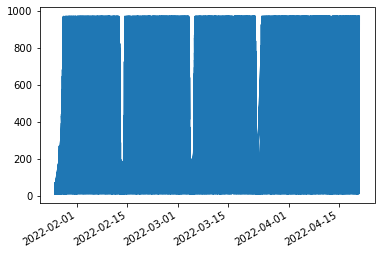

In [18]:
# Quick and dirty Depth timeseries plot
fig, ax = plt.subplots()

ax.plot(df1.index, df1.depth);
fig.autofmt_xdate()

In [19]:
# Drop rows with NaNs
df1 = df1.dropna(subset=['depth'])

C:\Users\aBr\AppData\Local\Temp\ipykernel_16980\2077855730.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));


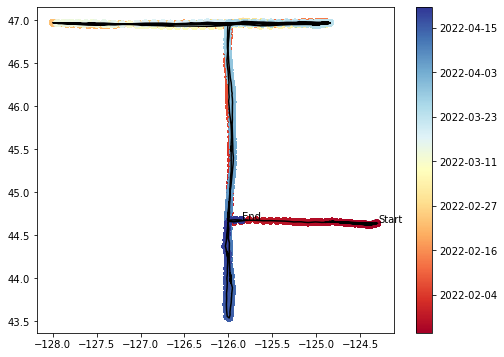

In [23]:
plt.figure(figsize=(8,6))

plt.plot(df1.lon_uv, df1.lat_uv, c='black')
plt.scatter(df1.lon_uv, df1.lat_uv, c=df1.index, cmap='RdYlBu')

# Label Start/End Points
plt.text(df1.lon_uv.iloc[0]+.01, df1.lat_uv.iloc[0]+.01, 'Start')
plt.text(df1.lon_uv.iloc[-1]+.01, df1.lat_uv.iloc[-1]+.01, 'End')

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

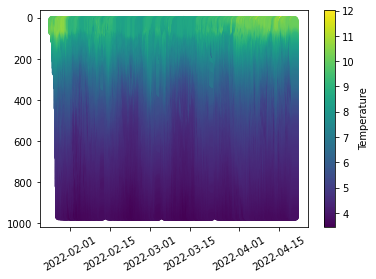

In [24]:
# Basic Transect plot
sc = plt.scatter(df1.index, df1['depth'], c=df1['temperature']);

plt.gca().invert_yaxis(); # Flip the y-axis
plt.xticks(rotation=30); # Rotate the date labels

cb1 = plt.colorbar(sc,label='Temperature') # Add a colorbar

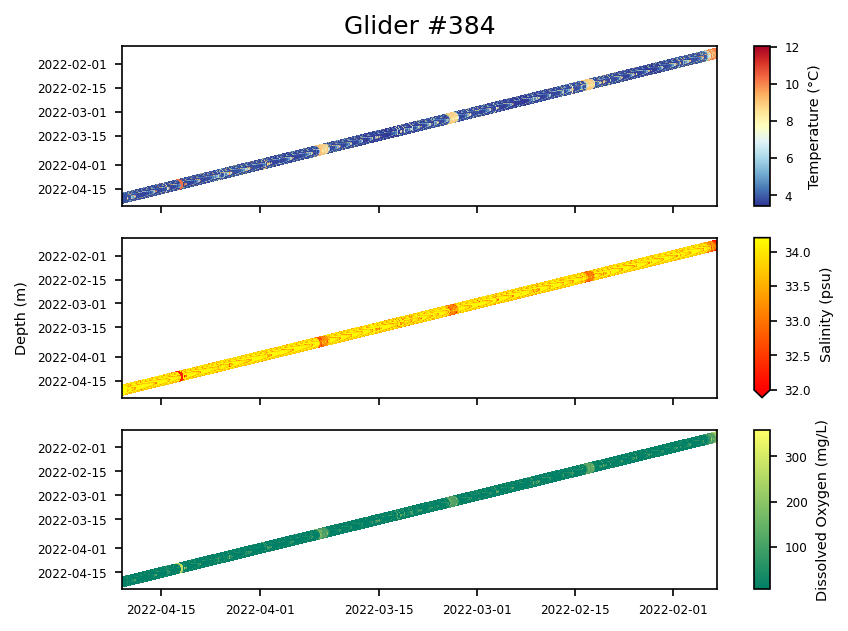

In [25]:
# Plot the data - Distance on x-axis
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, sharey=True)
fig.set_size_inches(6.4,4.8)
# fig.set_size_inches(8,8)
fig.set_dpi(150)

ms = 56 #marker size
a1 = ax1.scatter(df1.index, df1.index, c=df1.temperature, marker=".", s=ms, cmap='RdYlBu_r')
a2 = ax2.scatter(df1.index, df1.index, c=df1.salinity, marker=".", s=ms, cmap='autumn', vmin=32, vmax=34.2)
a3 = ax3.scatter(df1.index, df1.index, c=df1.dissolved_oxygen, marker=".", s=ms, cmap='summer') #vmin=0, vmax=300

cb1 = plt.colorbar(a1,ax=ax1, aspect=10)
cb2 = plt.colorbar(a2,ax=ax2,extend='min', aspect=10)
cb3 = plt.colorbar(a3,ax=ax3, aspect=10)
cb1.set_label('Temperature (°C)',fontsize='x-small')
cb2.set_label('Salinity (psu)',fontsize='x-small')
cb3.set_label('Dissolved Oxygen (mg/L)',fontsize='x-small')

ax2.set_ylabel("Depth (m)",fontsize='x-small')
ax1.invert_yaxis()

ax1.set_xlim(min(df1.index),max(df1.index));
ax1.invert_xaxis()

ax1.set_title('Glider #384')

ax1.tick_params(labelsize='xx-small')
ax2.tick_params(labelsize='xx-small')
ax3.tick_params(labelsize='xx-small')
cb1.ax.tick_params(labelsize='xx-small')
cb2.ax.tick_params(labelsize='xx-small')
cb3.ax.tick_params(labelsize='xx-small')

Text(0, 0.5, 'Depth (m)')

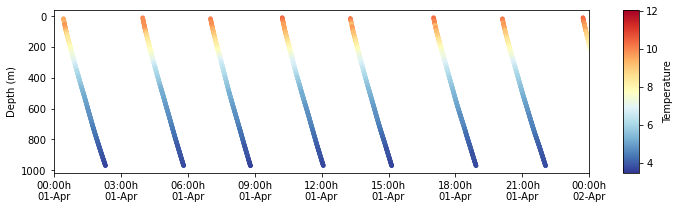

In [26]:
# Glider Transect plot
fig,ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(12,3))
sc1 = ax1.scatter(df1.index, df1.depth, c=df1.temperature, s=12, cmap='RdYlBu_r')
cb1 = plt.colorbar(sc1, ax=ax1, aspect=10, label='Temperature')
ax1.invert_yaxis() # Invert y axis

# Specify the date range we want to plot as year,month,day
import datetime
ax1.set_xlim( datetime.datetime(2022,4,1), datetime.datetime(2022,4,2) ); 

# Fancier Date Labels
import matplotlib.dates as mdates
xfmt = mdates.DateFormatter("%H:%Mh\n%d-%b")
ax1.xaxis.set_major_formatter(xfmt)

ax1.set_ylabel('Depth (m)')

C:\Users\aBr\AppData\Local\Temp\ipykernel_16980\3023620969.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));


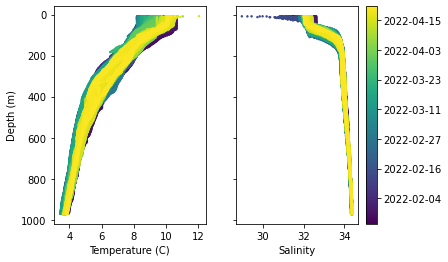

In [52]:
# Temperature Salinity Profile with Date
fig,(ax1,ax2) = plt.subplots(1, 2, sharey=True)
dx = ax1.scatter(df1.temperature, df1.depth, c=df1.index, s=2)
dx1 = ax2.scatter(df1.salinity, df1.depth, c=df1.index, s=2)
ax1.invert_yaxis()

ax1.set_xlabel('Temperature (C)')
ax2.set_xlabel('Salinity')
ax1.set_ylabel('Depth (m)');

cb =fig.colorbar(dx1,ax=ax2)
cb.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

Text(0.5, 0, 'Salinuty')

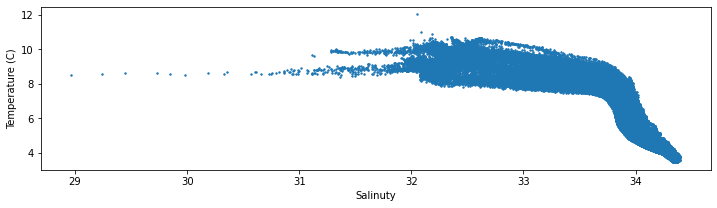

In [94]:
fig,ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(12,3))

sc1 =ax1.scatter(df1.salinity,df1.temperature, s=2)

ax1.set_ylabel('Temperature (C)')
ax1.set_xlabel('Salinuty')

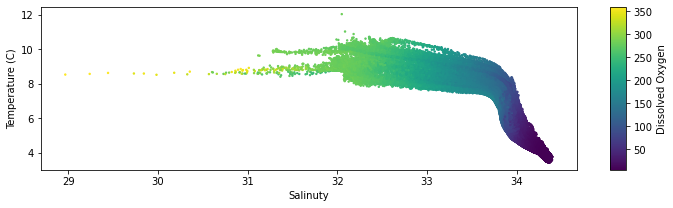

In [88]:
fig,ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(12,3))

sc1 =ax1.scatter(df1.salinity,df1.temperature, c=df1.dissolved_oxygen, s=2)

ax1.set_ylabel('Temperature (C)')
ax1.set_xlabel('Salinuty')
cb1 = plt.colorbar(sc1, ax=ax1, aspect=10, label='Dissolved Oxygen')

In [104]:
import seawater,gsw

In [96]:
# Figure out boudaries (mins and maxs)
smin = df1['salinity'].min() - (0.01 * df1['salinity'].min())
smax = df1['salinity'].max() + (0.01 * df1['salinity'].max())
tmin = df1['temperature'].min() - (0.1 * df1['temperature'].max())
tmax = df1['temperature'].max() + (0.1 * df1['temperature'].max())

In [101]:
# Calculate the density lines
x = int(round((smax-smin)/0.1+1,0))
y = int(round((tmax-tmin)+1,0))

In [103]:
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,y-1,y)+tmin
si = np.linspace(1,x-1,x)*0.1+smin

In [113]:
# Create empty grid of zeros
dens = np.zeros((y,x))

# Loop to fill in grid with densities
for j in range(0,int(y)):
    for i in range(0, int(x)):
        dens[j,i]=gsw.rho(si[i],ti[j],0)

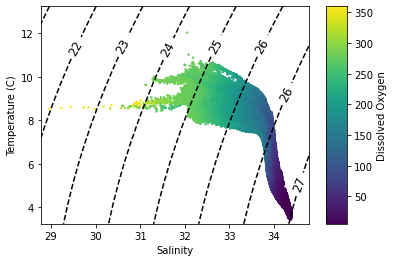

In [114]:
# Substract 1000 to convert to sigma-t
dens = dens - 1000

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%1.0f') # Label every second level
 
sc1 =ax1.scatter(df1.salinity,df1.temperature, c=df1.dissolved_oxygen, s=2)
 
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Temperature (C)')
cb1 = plt.colorbar(sc1, ax=ax1, aspect=10, label='Dissolved Oxygen')
plt.show()

In [67]:
df2 = df1[df1['profile']==780]

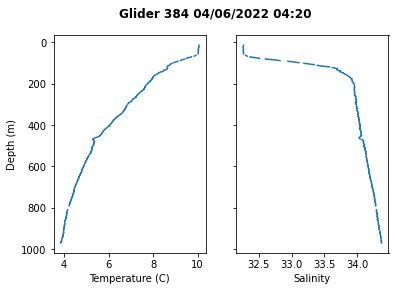

In [68]:
# Plot a single profile
fig,(ax1,ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(df2.temperature, df2.depth)
ax2.plot(df2.salinity, df2.depth)

ax1.invert_yaxis()

ax1.set_xlabel('Temperature (C)')
ax2.set_xlabel('Salinity')
ax1.set_ylabel('Depth (m)');

title = 'Glider 384 %s' % df2.index[0].strftime("%m/%d/%Y %H:%M")
fig.suptitle(title, fontweight='bold');


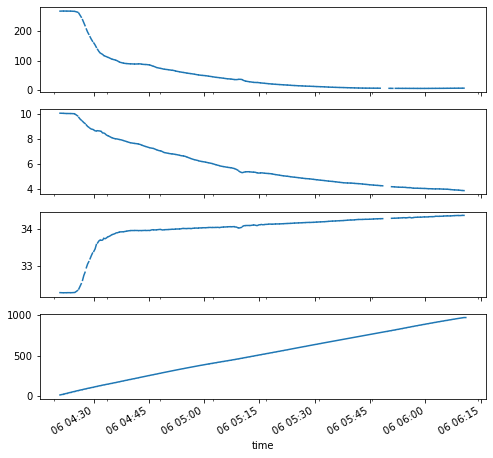

In [69]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, sharex=True, figsize=(8,8))
df2.dissolved_oxygen.plot(ax=ax1)
df2.temperature.plot(ax=ax2)
df2.salinity.plot(ax=ax3)
df2.depth.plot(ax=ax4);

C:\Users\aBr\AppData\Local\Temp\ipykernel_16980\1663334283.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df1['2022-04-2 15:00':'2022-04-05 04:00'].lon_uv.plot();
C:\Users\aBr\AppData\Local\Temp\ipykernel_16980\1663334283.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df1['2022-03-13 06:00':'2017-03-14 14:00'].lon_uv.plot();


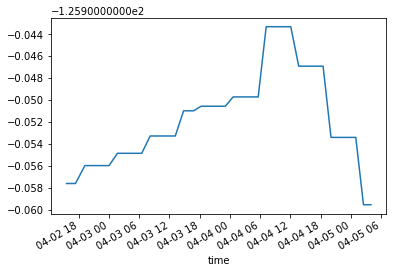

In [77]:
df1['2022-04-2 15:00':'2022-04-05 04:00'].lon_uv.plot(); 
df1['2022-03-13 06:00':'2017-03-14 14:00'].lon_uv.plot();

In [78]:
df1

,FID,profile,depth,segment,distance,trajectory,lat_uv,lon_uv,time_uv,u,...,qartod_temperature_gross_range_flag,qartod_temperature_primary_flag,qartod_temperature_rate_of_change_flag,qartod_temperature_spike_flag,roll,salinity,temperature,geom,source,source_id
time,,,,,,,,,,,,,,,,,,,,,
2022-01-25 19:36:30.079,9886d82b-5107-5390-a97c-483d08533113.1,0,9.373403,0,0.00,0,44.637481,-124.304370,1.643140e+09,0.016631,...,1.0,1.0,2.0,1.0,7.399979,31.132622,9.6281,POINT (-124.3033235242054 44.63791282960069),ioos.gliderdac.gliderdac,ce_382-20220125T1919
2022-01-25 19:36:51.005,9886d82b-5107-5390-a97c-483d08533113.2,0,13.221829,0,2.56,0,44.637481,-124.304370,1.643140e+09,0.016631,...,1.0,1.0,1.0,1.0,7.399979,31.771090,9.7523,POINT (-124.3033149705564 44.6378905901134),ioos.gliderdac.gliderdac,ce_382-20220125T1919
2022-01-25 19:37:11.996,9886d82b-5107-5390-a97c-483d08533113.3,0,17.228876,0,5.17,0,44.637481,-124.304370,1.643140e+09,0.016631,...,1.0,1.0,1.0,1.0,7.399979,32.118690,9.9353,POINT (-124.3033231668851 44.63786784566835),ioos.gliderdac.gliderdac,ce_382-20220125T1919
2022-01-25 19:37:30.197,9886d82b-5107-5390-a97c-483d08533113.4,0,17.228876,0,10.25,0,44.637481,-124.304370,1.643140e+09,0.016631,...,NaN,NaN,NaN,NaN,7.399979,NaN,NaN,POINT (-124.3033799514114 44.63784683826152),ioos.gliderdac.gliderdac,ce_382-20220125T1919
2022-01-25 19:37:32.234,9886d82b-5107-5390-a97c-483d08533113.5,0,20.670509,0,10.81,0,44.637481,-124.304370,1.643140e+09,0.016631,...,1.0,1.0,1.0,1.0,7.399979,32.150429,9.9626,POINT (-124.3033863070784 44.63784448698572),ioos.gliderdac.gliderdac,ce_382-20220125T1919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-20 16:02:41.718,9886d82b-5107-5390-a97c-483d08533113.316382,927,964.395264,0,2167269.75,0,44.674799,-125.851561,1.650464e+09,-0.051047,...,NaN,NaN,NaN,NaN,2.199998,NaN,NaN,POINT (-125.8287041751465 44.67071594714632),ioos.gliderdac.gliderdac,ce_382-20220125T1919
2022-04-20 16:02:43.766,9886d82b-5107-5390-a97c-483d08533113.316383,927,967.120178,0,2167270.50,0,44.674799,-125.851561,1.650464e+09,-0.051047,...,1.0,1.0,1.0,1.0,2.199998,34.382748,3.8107,POINT (-125.8286973064549 44.6707147200269),ioos.gliderdac.gliderdac,ce_382-20220125T1919
2022-04-20 16:03:03.936,9886d82b-5107-5390-a97c-483d08533113.316384,927,969.854919,0,2167276.00,0,44.674799,-125.851561,1.650464e+09,-0.051047,...,1.0,1.0,1.0,1.0,2.199998,34.385635,3.8042,POINT (-125.8286296559771 44.67070263399663),ioos.gliderdac.gliderdac,ce_382-20220125T1919


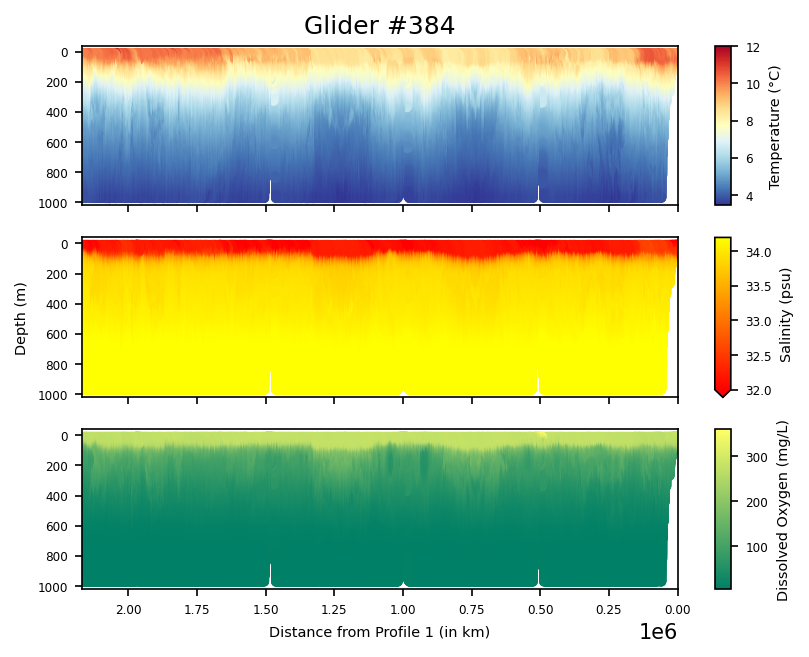

In [80]:
# Plot the data - Distance on x-axis
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, sharey=True)
fig.set_size_inches(6.4,4.8)
# fig.set_size_inches(8,8)
fig.set_dpi(150)

ms = 56 #marker size
a1 = ax1.scatter(df1.distance, df1.depth, c=df1.temperature, marker=".", s=ms, cmap='RdYlBu_r')
a2 = ax2.scatter(df1.distance, df1.depth, c=df1.salinity, marker=".", s=ms, cmap='autumn', vmin=32, vmax=34.2)
a3 = ax3.scatter(df1.distance, df1.depth, c=df1.dissolved_oxygen, marker=".", s=ms, cmap='summer') #vmin=0, vmax=300

cb1 = plt.colorbar(a1,ax=ax1, aspect=10)
cb2 = plt.colorbar(a2,ax=ax2,extend='min', aspect=10)
cb3 = plt.colorbar(a3,ax=ax3, aspect=10)
cb1.set_label('Temperature (°C)',fontsize='x-small')
cb2.set_label('Salinity (psu)',fontsize='x-small')
cb3.set_label('Dissolved Oxygen (mg/L)',fontsize='x-small')

ax2.set_ylabel("Depth (m)",fontsize='x-small')
ax1.invert_yaxis()

ax3.set_xlabel('Distance from Profile 1 (in km)',fontsize='x-small')
ax1.set_xlim(min(df1.distance),max(df1.distance));
ax1.invert_xaxis()

ax1.set_title('Glider #384')

ax1.tick_params(labelsize='xx-small')
ax2.tick_params(labelsize='xx-small')
ax3.tick_params(labelsize='xx-small')
cb1.ax.tick_params(labelsize='xx-small')
cb2.ax.tick_params(labelsize='xx-small')
cb3.ax.tick_params(labelsize='xx-small')

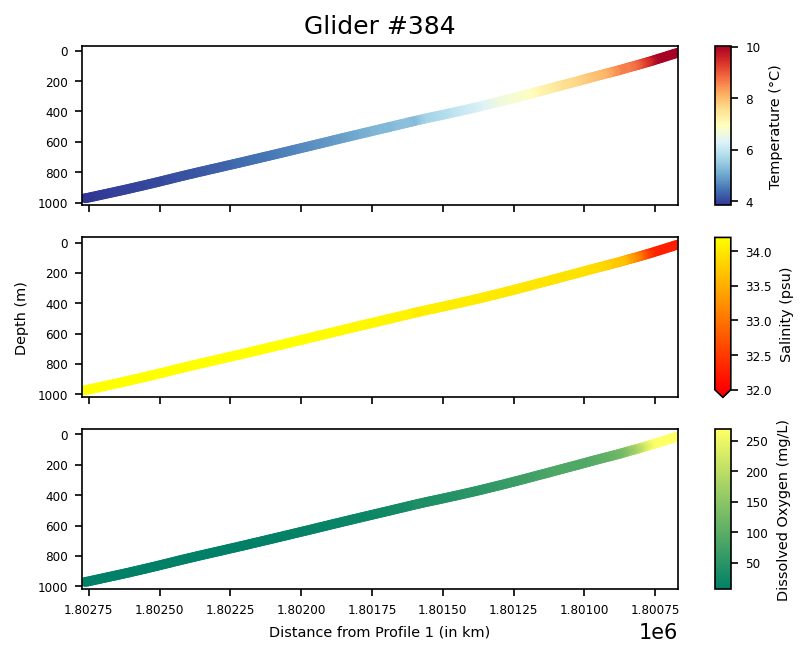

In [81]:
# Plot the data - Distance on x-axis
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, sharey=True)
fig.set_size_inches(6.4,4.8)
# fig.set_size_inches(8,8)
fig.set_dpi(150)

ms = 56 #marker size
a1 = ax1.scatter(df2.distance, df2.depth, c=df2.temperature, marker=".", s=ms, cmap='RdYlBu_r')
a2 = ax2.scatter(df2.distance, df2.depth, c=df2.salinity, marker=".", s=ms, cmap='autumn', vmin=32, vmax=34.2)
a3 = ax3.scatter(df2.distance, df2.depth, c=df2.dissolved_oxygen, marker=".", s=ms, cmap='summer') #vmin=0, vmax=300

cb1 = plt.colorbar(a1,ax=ax1, aspect=10)
cb2 = plt.colorbar(a2,ax=ax2,extend='min', aspect=10)
cb3 = plt.colorbar(a3,ax=ax3, aspect=10)
cb1.set_label('Temperature (°C)',fontsize='x-small')
cb2.set_label('Salinity (psu)',fontsize='x-small')
cb3.set_label('Dissolved Oxygen (mg/L)',fontsize='x-small')

ax2.set_ylabel("Depth (m)",fontsize='x-small')
ax1.invert_yaxis()

ax3.set_xlabel('Distance from Profile 1 (in km)',fontsize='x-small')
ax1.set_xlim(min(df2.distance),max(df2.distance));
ax1.invert_xaxis()

ax1.set_title('Glider #384')

ax1.tick_params(labelsize='xx-small')
ax2.tick_params(labelsize='xx-small')
ax3.tick_params(labelsize='xx-small')
cb1.ax.tick_params(labelsize='xx-small')
cb2.ax.tick_params(labelsize='xx-small')
cb3.ax.tick_params(labelsize='xx-small')

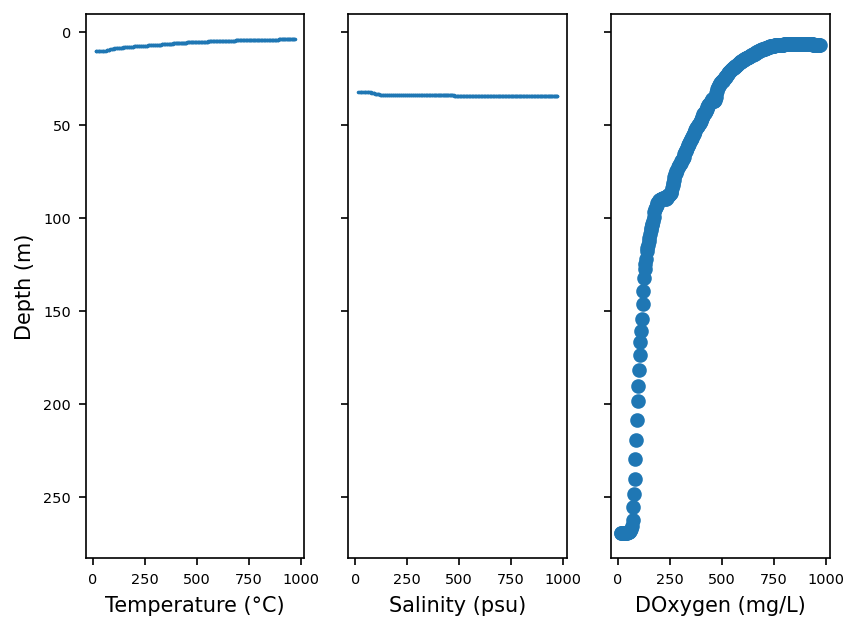

In [93]:
# Plot the data
fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharex=False, sharey=True)
fig.set_size_inches(6.4,4.8)
fig.set_dpi(150)

a1 = ax1.scatter(df2.depth, df2.temperature, marker=".", s=2)
a2 = ax2.scatter(df2.depth, df2.salinity, marker=".", s=2)
a3 = ax3.scatter(df2.depth, df2.dissolved_oxygen)
ax1.set_ylabel("Depth (m)")
ax1.set_xlabel("Temperature (°C)")
ax2.set_xlabel("Salinity (psu)")
ax3.set_xlabel("DOxygen (mg/L)")

ax1.invert_yaxis()

ax1.tick_params(labelsize='x-small')
ax2.tick_params(labelsize='x-small')
ax3.tick_params(labelsize='x-small')